# EDA pagos en 2 años

Needed libraries

In [83]:
#import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

import plotly.express as px
from scipy import stats
from scipy.stats import norm, skew # para estadisticas


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) # limitar flotantes a 3 decimales


from subprocess import check_output


Load dataset

In [84]:
df = pd.read_csv(r'data\train.csv',encoding='latin-1')
df.head()

,Id,target,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,44164,0,0.768,68y,1,0.688,2178.000,12,0,1,0,0.000
1,95356,0,0.290,52y,0,0.385,3750.000,16,0,1,0,1.000
2,108917,0,0.000,54y,0,0.347,6833.000,8,0,1,0,0.000
3,99039,0,0.046,66y,1,0.408,5200.000,6,0,1,0,1.000
4,116168,0,0.169,45y,0,4702.000,NaN,10,0,3,0,1.000


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73363 entries, 0 to 73362
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Id                                    73363 non-null  int64  
 1   target                                73363 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  73363 non-null  float64
 3   age                                   73363 non-null  object 
 4   NumberOfTime30-59DaysPastDueNotWorse  73363 non-null  int64  
 5   DebtRatio                             73363 non-null  float64
 6   MonthlyIncome                         58796 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       73363 non-null  int64  
 8   NumberOfTimes90DaysLate               73363 non-null  int64  
 9   NumberRealEstateLoansOrLines          73363 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  73363 non-null  int64  
 11  NumberOfDepende

Dataframe Columns meaning:
- Revolving Utilization of Unsecured Lines (RUUL) -- Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits.
- DebtRatio -- Monthly debt payments, alimony,living costs divided by monthy gross income
- NumberOfOpenCreditLinesAndLoans
- NumberOfTime30-59DaysPastDueNotWorse
- MonthlyIncome
- NumberOfTimes90DaysLate
- NumberRealEstateLoansOrLines
- NumberOfTime60-89DaysPastDueNotWorse
- NumberOfDependents
- age

# Data Visualization and Feature Engineering

In [86]:
df['age'] = df['age'].apply(lambda x: str(x).split('y')[0])
df['age'] = df['age'].apply(int)

In [104]:
df.dropna(inplace=True)

In [105]:
df.describe()

,Id,target,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,58796.000,58796.000,58796.000,58796.000,58796.000,58796.000,58796.000,58796.000,58796.000,58796.000,58796.000,58796.000
mean,75038.469,0.068,5.786,51.351,0.370,27.295,6649.145,8.754,0.201,1.057,0.177,0.849
std,43270.905,0.253,236.850,14.426,3.349,470.762,10461.631,5.172,3.314,1.158,3.296,1.145
min,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,37656.500,0.000,0.035,41.000,0.000,0.142,3400.000,5.000,0.000,0.000,0.000,0.000
50%,74961.000,0.000,0.177,51.000,0.000,0.295,5400.000,8.000,0.000,1.000,0.000,0.000
75%,112507.750,0.000,0.579,62.000,0.000,0.482,8300.000,11.000,0.000,2.000,0.000,2.000
max,149998.000,1.000,29110.000,103.000,98.000,61106.500,1560100.000,57.000,98.000,32.000,98.000,13.000


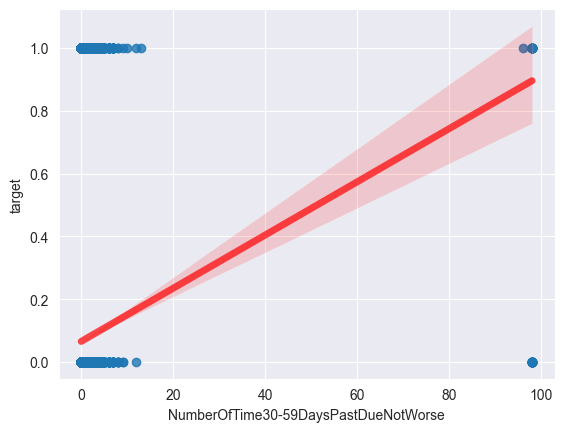

In [106]:
sns.regplot(x=df["NumberOfTime30-59DaysPastDueNotWorse"], y=df["target"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

Text(0.5, 1.0, 'Age of clients that didn not complete paymnets in two years')

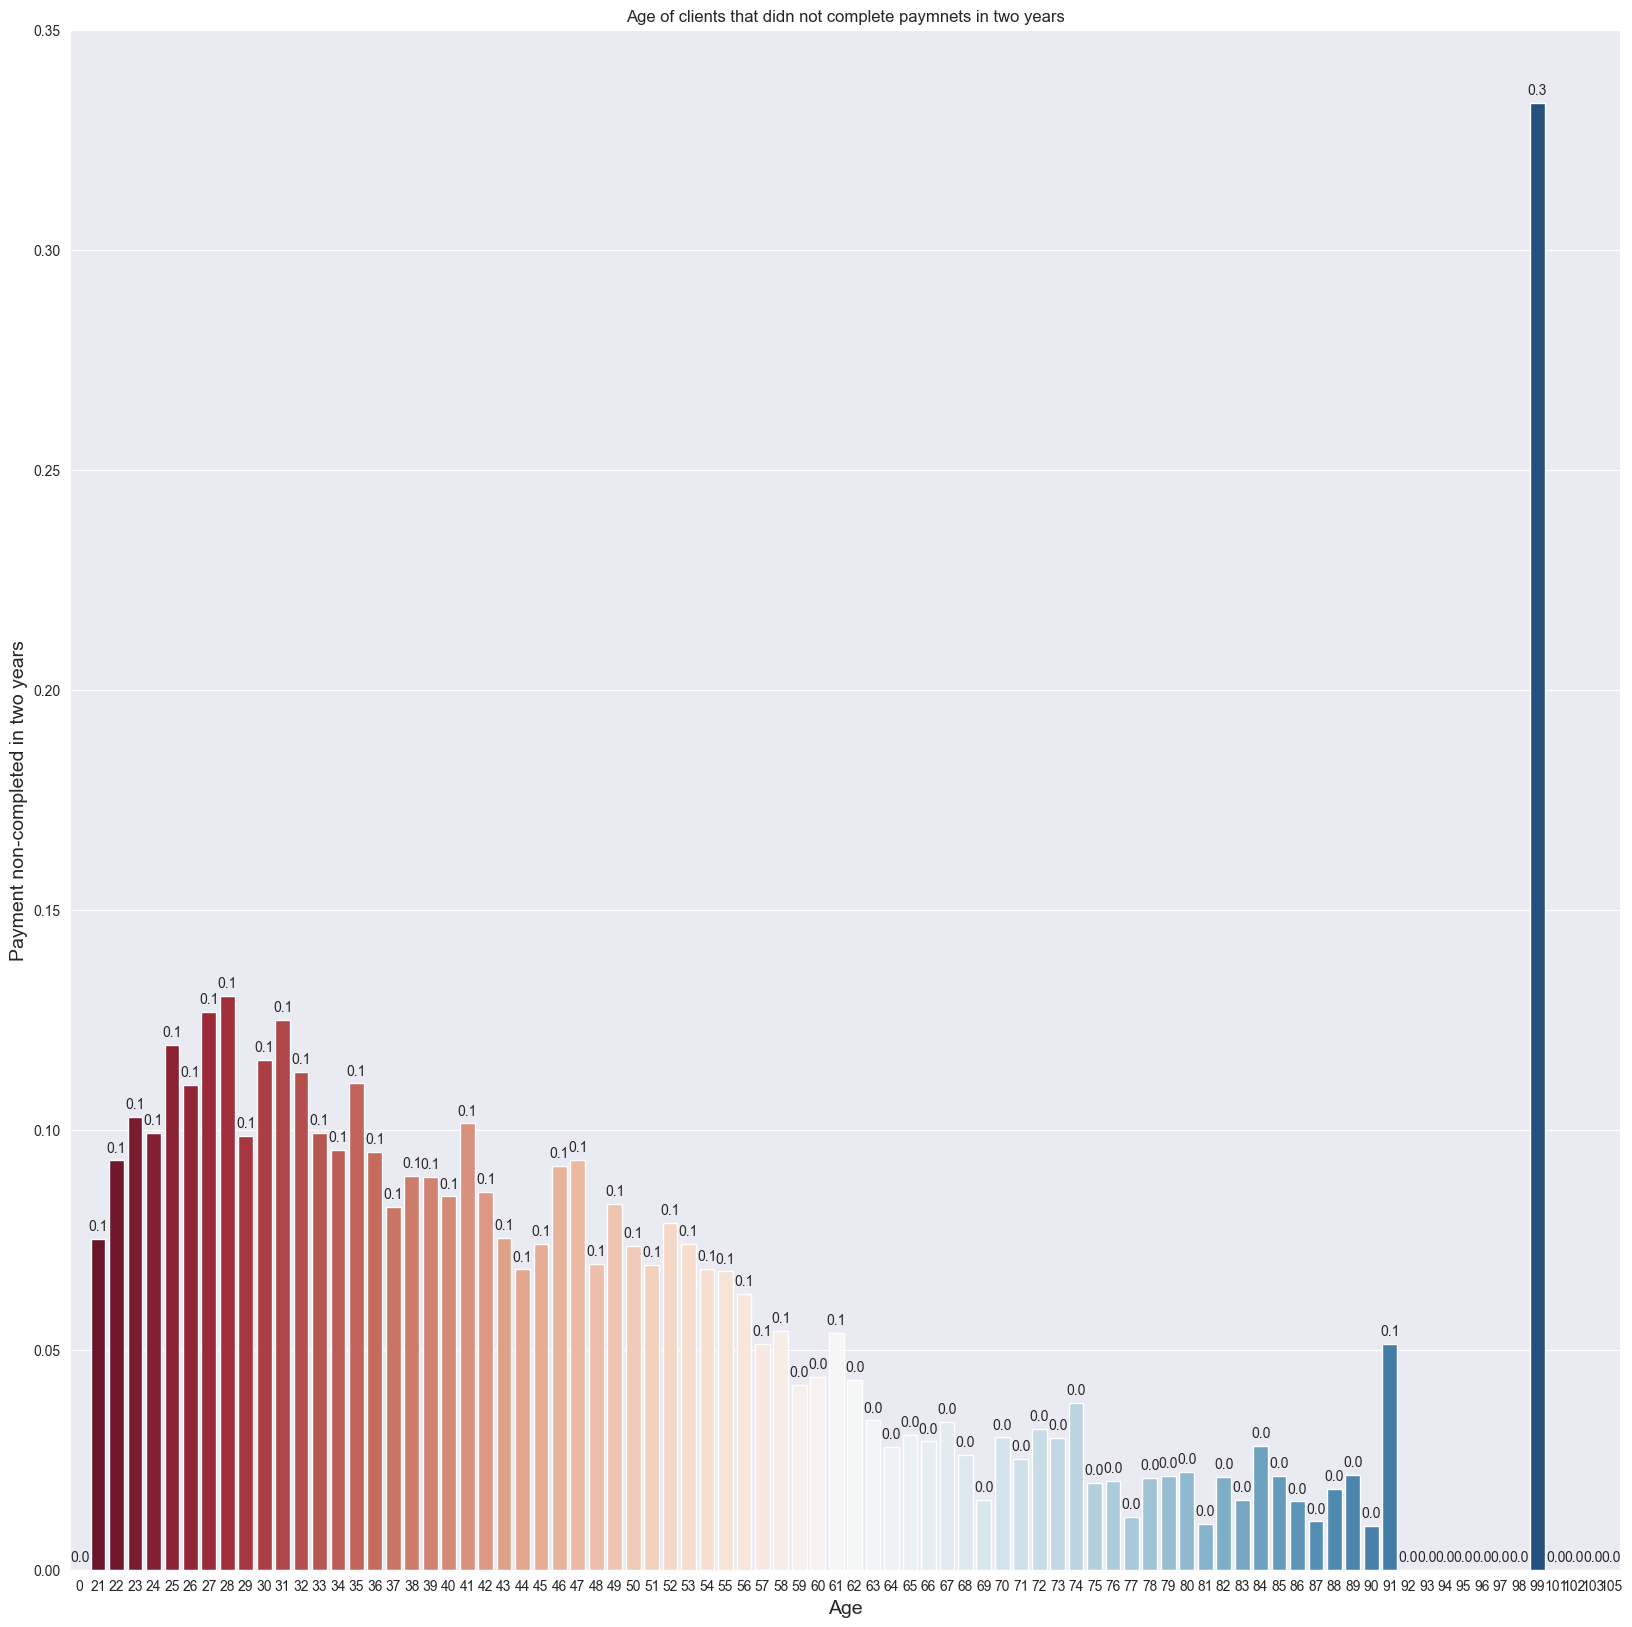

In [89]:
temp = df.groupby(['age']).mean().reset_index().sort_values(by='target',ascending=False)
plt.figure(figsize = (20,20))
splot = sns.barplot(data = temp,x = 'age', y = 'target',palette = 'RdBu')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Age", size=14)
plt.ylabel("Payment non-completed in two years", size=14)
plt.title('Age of clients that didn not complete paymnets in two years')

In [90]:
temp = df.groupby(['NumberRealEstateLoansOrLines','NumberOfDependents']).mean().reset_index().sort_values(by='target',ascending=False)
px.scatter(data_frame = temp, x = 'NumberRealEstateLoansOrLines', y = 'target',color = 'NumberOfDependents',title = 'Promedio del precio de las Laptop por Company/RAM')

**Chequeamos outliers**

In [91]:
px.scatter(data_frame = df,x = 'DebtRatio',y = 'target')

In [92]:
px.scatter(data_frame = df,x = 'NumberOfTimes90DaysLate',y = 'target')

In [93]:
#Quitamos Outliers 
df = df[~((df['age'] > 99) & (df['age'] < 20))]

In [94]:
df = df[~((df['Price_euros'] == 4899) &(df['Inches']== 15.6))]
df = df[~((df['Price_euros'] >= 5000) &(df['Inches']== 17.3))]

KeyError: 'Price_euros'

> Podemos comparar fácilmente los precios de las computadoras portátiles con respecto a la RAM

In [ ]:
temp = df.groupby(['Company','Memory']).mean().reset_index().sort_values(by='Price_euros',ascending=False)
px.scatter(data_frame = temp, x = 'Memory', y = 'Price_euros',color = 'Company',title = 'Promedio del precio de las Laptop Price por Company/Memory')

In [ ]:
temp = df.groupby(['Company','Inches']).mean().reset_index().sort_values(by='Price_euros',ascending=False)
px.scatter(data_frame = temp, x = 'Inches', y = 'Price_euros',color = 'Company', title = 'Promedio del precios de las Laptop Price por Company/Size')

# Comprobación de la asimetría y transformación de la columna target


 mu = 0.07 and sigma = 0.25



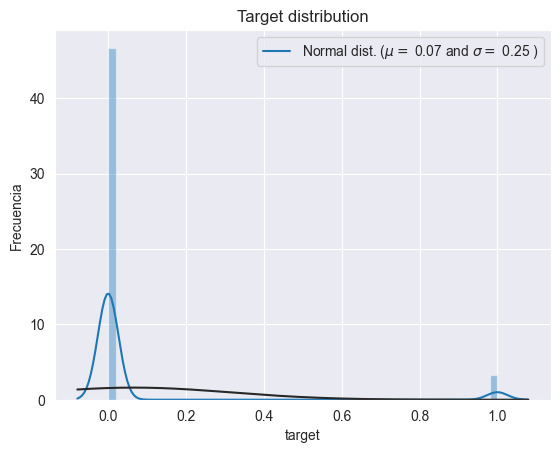

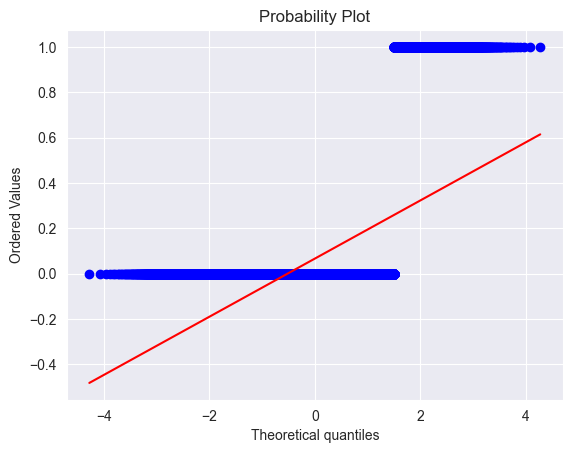

In [ ]:
sns.distplot(df['target'] , fit=norm)
# Obtener los parámetros ajustados utilizados por la función
(mu, sigma) = norm.fit(df['target'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# plot de la distribucion
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frecuencia')
plt.title('Target distribution')

fig = plt.figure()
res = stats.probplot(df['target'], plot=plt)
plt.show()

<Axes: >

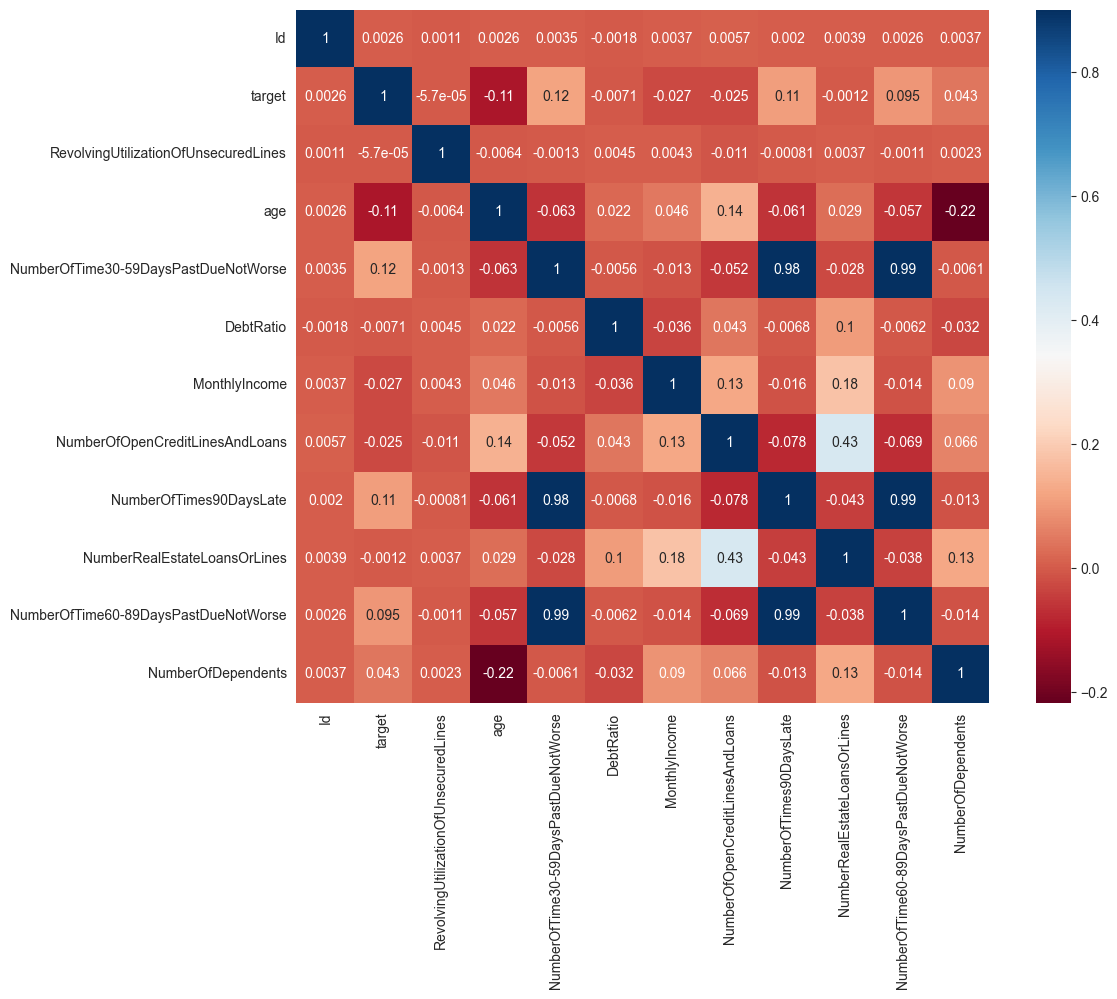

In [ ]:
#Correlacion 
corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True,cmap = 'RdBu',annot = True)

**Existe intercorrelación entre algunas variables**

In [95]:
df_clean = df.drop(columns = ['Id', 'NumberOfTime30-59DaysPastDueNotWorse'])

In [97]:
df_clean.columns

Index(['target', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'],
      dtype='object')

In [98]:
df.head()

,Id,target,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,44164,0,0.768,68,1,0.688,2178.000,12,0,1,0,0.000
1,95356,0,0.290,52,0,0.385,3750.000,16,0,1,0,1.000
2,108917,0,0.000,54,0,0.347,6833.000,8,0,1,0,0.000
3,99039,0,0.046,66,1,0.408,5200.000,6,0,1,0,1.000
4,116168,0,0.169,45,0,4702.000,NaN,10,0,3,0,1.000


# Model Building

In [47]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import lightgbm as lgb


In [24]:
X = df.iloc[:,:-1]
y = df['Price_euros']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [26]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

**Linear Reggression**

In [48]:
lm = LinearRegression()
lm.fit(X_train, y_train)
score = rmsle_cv(lm)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.4015 (0.0243)



**Lasso Regression**

In [27]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.4015 (0.0240)



**Elastic Net Regression**

In [28]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.4015 (0.0240)



**Kernel Ridge Regression**

In [29]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.3150 (0.0139)



**Gradient Boosting Regression**

In [30]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1780 (0.0182)



**XGBoost Regression**

In [49]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1, verbosity=0)
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1819 (0.0222)



**LGBM**

In [64]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

In [65]:
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1871 (0.0198)



In [33]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.4015 (0.0240)



In [34]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.3150 (0.0139)



# Fitting the best model and getting the predictions array

In [43]:
GBoost.fit(X_train,y_train)
gboost_pred = GBoost.predict(X_test)


In [44]:
result = pd.DataFrame({'Y_TEST':y_test.values,'Y_PRED' : pd.Series(gboost_pred).values})

In [45]:
result

,Y_TEST,Y_PRED
0,6.739,6.625
1,5.356,5.204
2,7.409,7.560
3,7.208,7.317
4,7.228,7.004
...,...,...
132,6.683,6.664
133,7.201,7.155
134,7.871,7.759
135,7.534,7.374


In [46]:
px.line(data_frame = result)